In [1]:
# Standard python packages
import os
import numpy as np
import pandas as pd

# LavAtmos: Example 1 
### Running LavAtmos for a Bulk Silicate Earth composition for a range of temperatures. 

In this notebook we will show how straightforward it is to use LavAtmos in order to calculate the partial pressures of the vapor species above a melt of bulk silicate earth (BSE) composition. Start by ensuring that the standard python packages imported above are all present in your build. Then make sure that the path to the LavAtmos module in the lines below is correct. If you are running the code in the docker provided for Thermoengine on the [ENKI](https://enki-portal.gitlab.io/ThermoEngine/) page, then you should not have to change the paths. 

In [2]:
os.chdir('/home/jovyan/ThermoEngine/LavAtmos')
from data.databases.janaf_data_importer_gef import janaf_data_importer
import lavatmos

Next up, we import the bulk silicate earth composition that was also used in the [Visscher and Fegley (2013) paper](https://doi.org/10.1088/2041-8205/767/1/L12). You may also chose to enter your own composition by either change the data file from which we are importing, or by defining a new dictionary type object with the percentage values for each included oxide. If you do the latter, ensure that the dictionary is in the same format as the one printed below. 

In [3]:
vf13_comps_df = pd.read_csv('/home/jovyan/ThermoEngine/LavAtmos/data/input/vf2013_comps.csv',index_col=0)
vf13_comps = {}
for name in vf13_comps_df.columns:
    vf13_comps[name] = vf13_comps_df[name].to_dict()
print(vf13_comps['BSE'])

{'SiO2': 45.4, 'MgO': 36.76, 'Al2O3': 4.48, 'TiO2': 0.21, 'FeO': 8.1, 'CaO': 3.65, 'Na2O': 0.349, 'K2O': 0.031}


Next up we initialise a LavAtmos system. This makes sure that the necessary thermochemical data is imported and loaded. 

In [4]:
system = lavatmos.melt_vapor_system()

With that done, the only thing left to do is to define the temperature values for which we want to calculated the vapor pressures. Let's chose 1500 to 4000 (the recommended range). 

In [5]:
T = np.arange(1500,4050,50)

Now we have all we have to do is run the `vaporise` from system by passing on the temperature `T` and the composition.

In [6]:
lavatmos_bse = system.vaporise(T, vf13_comps['BSE'])


Melt composition set to:
SiO2 : 4.540e+01%
MgO  : 3.676e+01%
Al2O3: 4.480e+00%
TiO2 : 2.100e-01%
FeO  : 8.100e+00%
CaO  : 3.650e+00%
Na2O : 3.490e-01%
K2O  : 3.100e-02%

Calculating vapor pressures for given temperature values
Calculated: 100%|██████████| 51/51 [00:40<00:00,  1.27it/s]
Done!


We can then use the following function to visualise the results:

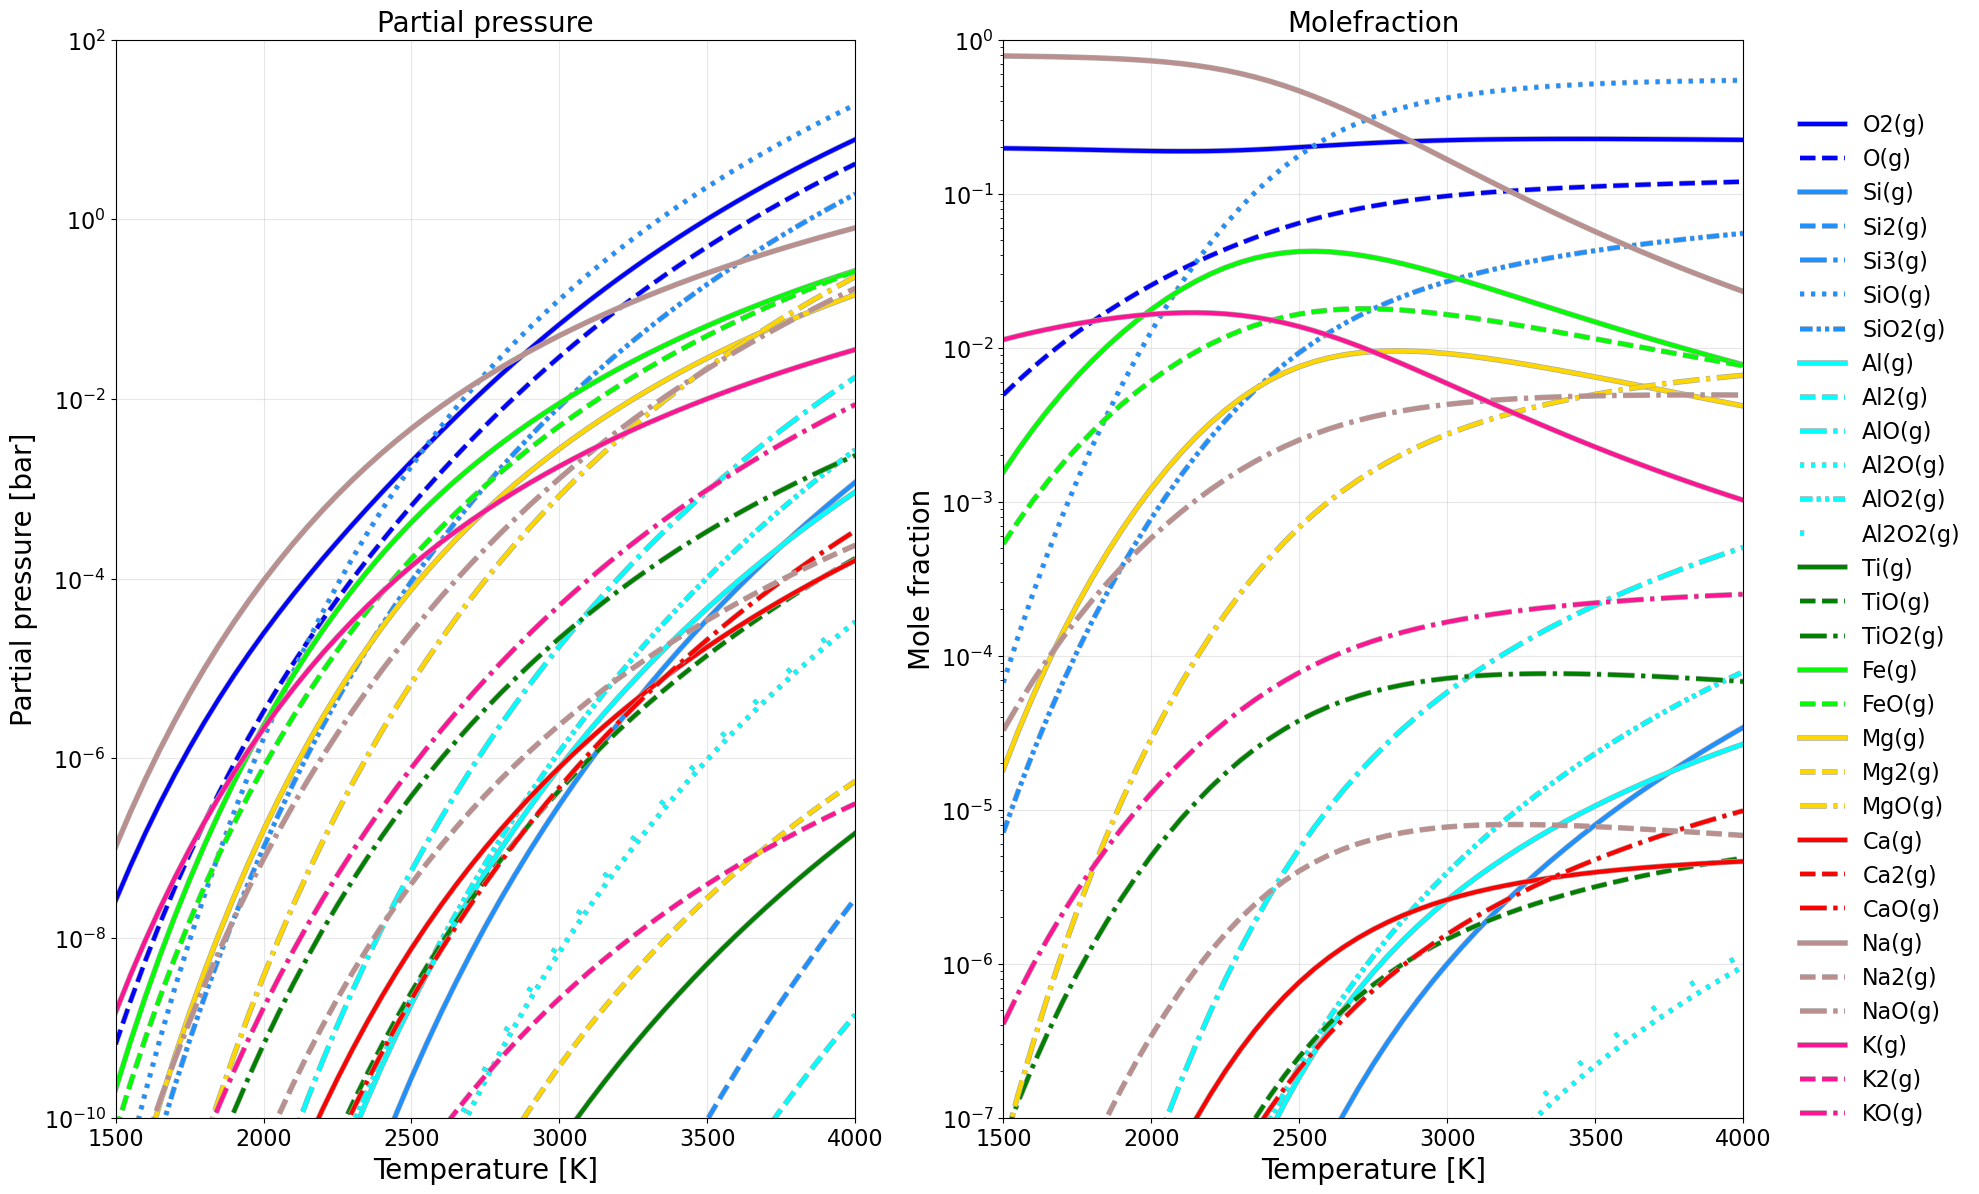

In [7]:
from library.plot_functions import example1_plot
example1_plot(T,lavatmos_bse)